### ClusificationTestMicrobiomics

In [337]:
import Bio
from Bio import SeqIO
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import pandas as pd 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [338]:
# data_root = "C:\\Users\\Tigran PC\\Desktop\\MicrobiomicsData\\data\\" # notebook
data_root = "/Users/tigran/Desktop/sbv/data/" # imac
# data_root = "D:\\sbv Microbiomics\\data\\" # istc pc

sub_data_root = data_root + "sample01split/"

In [339]:
full_seq1 = []
full_seq2 = []

with open(data_root + "CBMB205.fasta", 'r') as myfile:
    full_seq1=list(myfile.read().replace('\n', ''))
    
with open(data_root + "F0441.fna", 'r') as myfile:
    full_seq2=list(myfile.read().replace('\n', ''))

In [340]:
full_seq1 = full_seq1[:100000]
full_seq2 = full_seq2[:100000]
print(len(full_seq1))
print(len(full_seq2))

100000
100000


In [341]:
import random
cut_index1 = random.sample(range(0, len(full_seq1)-151), 10000)
cut_index2 = random.sample(range(0, len(full_seq2)-151), 10000)

In [342]:
seq_list1 = np.array([full_seq1[i:i+151] for i in cut_index1])
seq_list2 = np.array([full_seq2[i:i+151] for i in cut_index2])

seq_list1 = np.concatenate((seq_list1, np.zeros((len(seq_list1), 1))), axis=1)
seq_list2 = np.concatenate((seq_list2, np.ones((len(seq_list2), 1))), axis=1)


print(seq_list1.shape)
print(seq_list2.shape)

(10000, 152)
(10000, 152)


In [343]:
seq_list = np.concatenate((seq_list1, seq_list2), axis=0)
seq_list.shape

(20000, 152)

In [344]:
seq_list

array([['A', 'T', 'C', ..., 'G', 'A', '0.0'],
       ['A', 'T', 'T', ..., 'A', 'A', '0.0'],
       ['C', 'G', 'G', ..., 'T', 'A', '0.0'],
       ...,
       ['T', 'G', 'G', ..., 'C', 'C', '1.0'],
       ['T', 'T', 'T', ..., 'T', 'A', '1.0'],
       ['C', 'T', 'C', ..., 'T', 'T', '1.0']], dtype='<U32')

In [345]:
np.random.shuffle(seq_list)
seq_list

array([['G', 'T', 'C', ..., 'C', 'C', '0.0'],
       ['T', 'C', 'G', ..., 'C', 'T', '1.0'],
       ['G', 'T', 'C', ..., 'G', 'C', '0.0'],
       ...,
       ['G', 'C', 'T', ..., 'A', 'C', '0.0'],
       ['C', 'T', 'G', ..., 'T', 'A', '0.0'],
       ['A', 'A', 'T', ..., 'G', 'G', '0.0']], dtype='<U32')

In [352]:
df = pd.DataFrame(seq_list)

# df_train = df[:16000]
# df_test = df[16000:]

# print(df_train.shape)
# print(df_test.shape)
# df_train.to_csv(data_root + "DNA_data_train.csv")
# df_test.to_csv(data_root + "DNA_data_test.csv")

In [353]:
train_data = seq_list[:, :-1]
labels = seq_list[:, -1]
print(train_data.shape)
labels.shape

(20000, 151)


(20000,)

In [354]:
train_data_dumy = np.array(pd.get_dummies(pd.DataFrame(train_data)), dtype=float)
# df = pd.DataFrame(train_data_dumy)
# df.to_csv(data_root + "DNA_data_dum.csv")
train_data_dumy

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [355]:
x_train, x_test, y_train, y_test = train_test_split(train_data_dumy, labels, test_size=0.2)

### Random Forest

In [356]:
# rf = RandomForestClassifier(min_samples_leaf=20, min_weight_fraction_leaf=0.4, max_depth=7, )
# rf.fit(x_train, y_train)
# y_pred = rf.predict(x_test)

### XGboost

In [357]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=100, learning_rate=0.1).fit(x_train, y_train)
print("done")

In [358]:
y_pred = gbm.predict(x_test)
print("done")

/Users/tigran/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### SVM

In [373]:
clf = svm.SVC(C=5) #kernel='rbf', C=5, degree=2, tol=1e-7)
clf.fit(x_train, y_train) 
print("done")

done


In [374]:
y_pred = clf.predict(x_test)
print("done")

done


In [375]:
accuracy_score(y_test, y_pred)

0.71675

In [376]:
confusion_matrix(y_test, y_pred)

array([[1394,  641],
       [ 492, 1473]])

In [377]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.68501229 0.31498771]
 [0.25038168 0.74961832]]


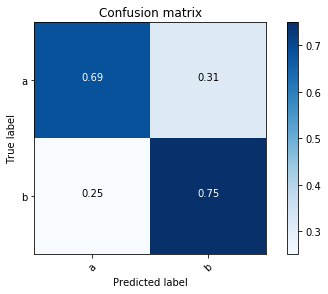

In [378]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['a','b'], normalize=True)